# 4 ROOT a as function plotter

Using one of ROOT’s powerful classes, here [TF1](https://root.cern.ch/doc/master/classTF1.html) will allow us to display a function of one variable, x. Try the following:                                        


In [1]:
TCanvas canvas_2("c", "c");
TF1 f1("f1","sin(x)/x",0.,10.);

``` f1 ``` is an instance of a ``` TF1 ``` class, the arguments are used in the constructor; the first one of type string is a name to be entered in the internal ROOT memory management system, the second string type parameter defines the function, here sin(x)/x, and the two parameters of type double define the range of the variable x. The Draw() method, here without any parameters, displays the function in a window which should pop up after you type the above two lines in your terminal or it will be displayed below your code in the notebook environment.

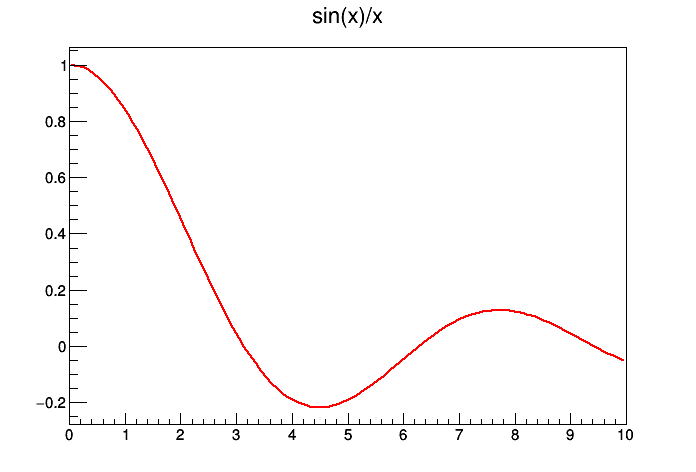

In [2]:
f1.Draw();
canvas_2.Draw();

A slightly extended version of this example is the definition of a function with parameters, called [0], [1] and so on in the ROOT formula syntax. We now need a way to assign values to these parameters; this is achieved with the method [SetParameter](https://root.cern.ch/doc/master/classTF1.html#ade6e54171210c6b1b955c9f813040eb8)(<parameter_number>,<parameter_value>) of class TF1. Here is an example:

In [3]:
TF1 f2("f2","[0]*sin([1]*x)/x",0.,10.);

You can try to change the parameters of the input below.

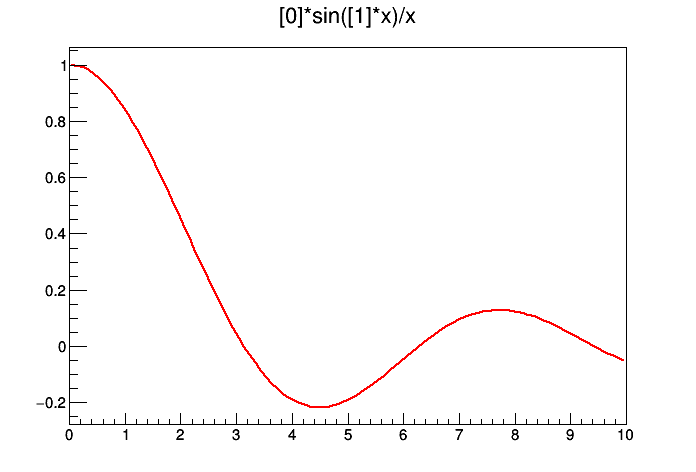

In [4]:
f2.SetParameter(0,1);
f2.SetParameter(1,1);
f2.Draw();
canvas_2.Draw();

Of course, this version shows the same results as the initial one. Try playing with the parameters and plot the function again. The class TF1 has a large number of very useful methods, including integration and differentiation. To make full use of this and other ROOT classes, visit the documentation on the Internet under http://root.cern.ch/drupal/content/reference-guide. Formulae in ROOT are evaluated using the class [TFormula](https://root.cern.ch/doc/master/classTFormula.html), also look up the relevant class documentation for examples, implemented functions and syntax.

You should definitely download this guide to your own system to have it at you disposal whenever you need it.

To extend a little bit on the above example, consider a more complex function you would like to define. You can also do this using standard C or C++ code.

Consider the example below, which calculates and displays the interference pattern produced by light falling on a multiple slit. If you are using your terminal please do not type the example below at the ROOT command line, there is a much simpler way: Make sure you have the file slits.C on disk, and type root slits.C in the shell. This will start root and make it read the “macro” slits.C, i.e. all the lines in the file will be executed one after the other.

In this example drawing the interference pattern of light falling on a grid with n slits and ratio r of slit width over distance between slits.

In [5]:
%%cpp -d

As always in the notebook envirement we need to declare that we are using C++ (as above). Something you will not need to do in your machine.

In [6]:
auto pi = TMath::Pi();

We define the necessary functions in C++ code, split into three separate functions, as suggested by the problem considered. The full interference pattern is given by the product of a function depending on the ratio of the width and distance of the slits, and a second one depending on the number of slits. More important for us here is the definition of the interface of these functions to make them usable for the ROOT class TF1: the first argument is the pointer to x, the second one points to the array of parameters.

In [7]:
%%cpp -d
double single(double *x, double *par) {
  return pow(sin(pi*par[0]*x[0])/(pi*par[0]*x[0]),2);
}

double nslit0(double *x,double *par){
  return pow(sin(pi*par[1]*x[0])/sin(pi*x[0]),2);
}

double nslit(double *x, double *par){
  return single(x,par) * nslit0(x,par);
}

Here is how the main program should look like.

It starts with the definition of a function slits() of type void. After asking for user input, a ROOT function is defined using the C-type function given in the beginning. We can now use all methods of the TF1 class to control the behaviour of our function – nice, isn’t it ?

In [8]:
%%cpp -d
  void slits() {
  float r,ns;


  r = 1;
  ns=0.45;
  
  /* // request user input for terminal use only
  cout << "slit width / g ? ";
  scanf("%f",&r);
  cout << "# of slits? ";
  scanf("%f",&ns);
  cout <<"interference pattern for "<< ns
       <<" slits, width/distance: "<<r<<endl;
  */

  // define function and set options
  TF1 *Fnslit  = new TF1("Fnslit",nslit,-5.001,5.,2);
  Fnslit->SetNpx(500);

  // set parameters, as read in above
  Fnslit->SetParameter(0,r);
  Fnslit->SetParameter(1,ns);

  // draw the interference pattern for a grid with n slits
  Fnslit->Draw();
}

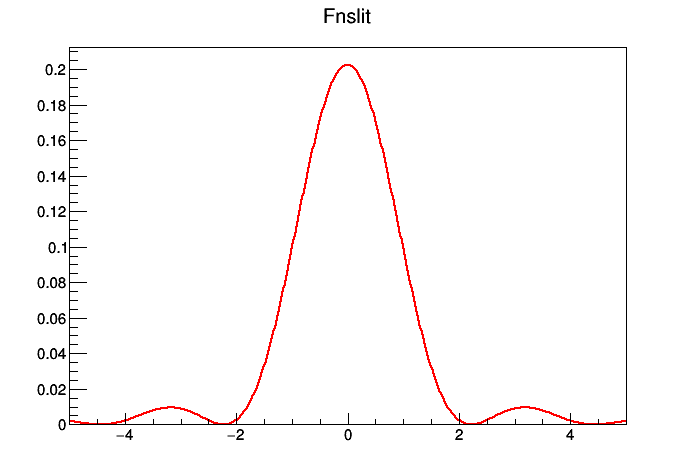

In [9]:
slits();
canvas_2.Draw();

Output of slits.C with parameters 0.2 and 2.

In the commented out section the example asks for user input, namely the ratio of slit width over slit distance, and the number of slits. After entering this information, you should see the graphical output as above.

This is a more complicated example than the ones we have seen before, so spend some time analysing it carefully, you should have understood it before continuing.

If you like, you can easily extend the example to also plot the interference pattern of a single slit, using function "double single", or of a grid with narrow slits, using function "double nslit0", in the TF1 instances.

Here, we used a macro, some sort of lightweight program, that the interpreter distributed with ROOT, Cling, is able to execute. This is a rather extraordinary situation, since C++ is not natively an interpreted language! There is much more to say: chapter 3 is dedicated to macros.

# 5 Histograms

Histograms play a fundamental role in any type of physics analysis, not only to visualise measurements but being a powerful form of data reduction. ROOT offers many classes that represent histograms, all inheriting from the [```TH1```](https://root.cern.ch/doc/master/classTH1.html) class. We will focus in this chapter on uni- and bi- dimensional histograms the bin contents of which are represented by floating point numbers in the [```TH1F```](https://root.cern.ch/doc/master/classTH1F.html) and [```TH2F```](https://root.cern.ch/doc/master/classTH2F.html) classes respectively. To optimise the memory usage you might go for one byte ([```TH1C```](https://root.cern.ch/doc/master/classTH1C.html)), short ([```TH1S```](https://root.cern.ch/doc/master/classTH1S.html)), integer ([```TH1I```](https://root.cern.ch/doc/master/classTH1I.html)) or double-precision ([```TH1D```](https://root.cern.ch/doc/master/classTH1D.html)) bin-content.

In [10]:
TCanvas canvas_2_6;
TF1 efunc("efunc","exp([0]+[1]*x)",0.,5.);
efunc.SetParameter(0,1);
efunc.SetParameter(1,-1);

The first lines of this example define a function, an exponential in this case, and set its parameters. 

In [11]:
TH1F hist_2_6_1("histogram 2.6.1","example histogram",100,0.,5.);

In this line a histogram is instantiated, with a name, a title, a certain number of bins (100 of them, equidistant, equally sized) in the range from 0 to 5.

We use yet another new feature of ROOT to fill this histogram with data, namely pseudo-random numbers generated with the method [```TF1::GetRandom```](https://root.cern.ch/doc/master/classTF1.html#ab44c5f63db88a3831d74c7c84dc6316b), which in turn uses an instance of the ROOT class [```TRandom```](https://root.cern.ch/doc/master/classTRandom.html) created when ROOT is started.

In [12]:
for (int i=0;i<1000;i++) {hist_2_6_1.Fill(efunc.GetRandom());}

Data is entered in the histogram using the method [```TH1F::Fill```](https://root.cern.ch/doc/master/classTH1.html#a77e71290a82517d317ea8d05e96b6c4a) in a loop construct. As a result, the histogram is filled with 1000 random numbers distributed according to the defined function. 

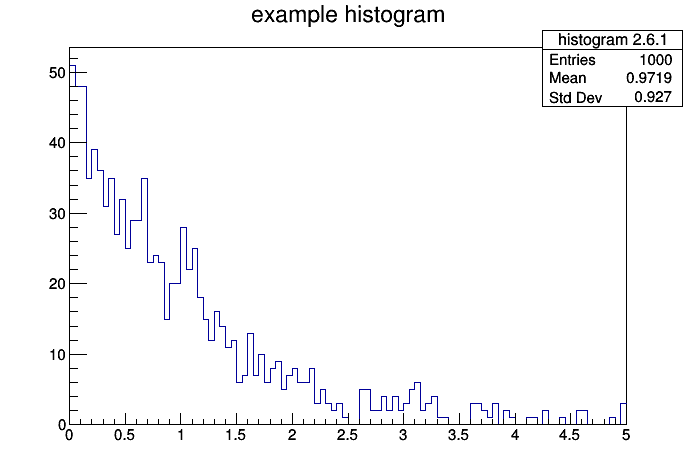

In [13]:
hist_2_6_1.Draw();
canvas_2_6.Draw();

The histogram is displayed using the method ```TH1F::Draw()```. You may think of this example as repeated measurements of the life time of a quantum mechanical state, which are entered into the histogram, thus giving a visual impression of the probability density distribution. The plot is shown above.

Note that you will never obtain an identical plot when executing the lines above. Depending on how the random number generator is initialised the plot will differ. Try it a couple of times and see the differences. 

The class ```TH1F``` does not contain a convenient input format from plain text files. The following lines of ```C++``` code do the job. One number per line stored in the text file “expo.dat” is read in via an input stream and filled in the histogram until the end of file is reached.

In [1]:
TH1F hist_2_6_2("histogram 2.6.2","example histogram",100,0.,5.);


In [2]:
ifstream inp; 
inp.open("../data/expo.dat");

In [ ]:
while (inp >> x) { hist_2_6_2.Fill(x); }

In [ ]:
hist_2_6_2.Draw();
inp.close();
canvas_2_6.Draw();

## 5.1 Your First Histogram
Let’s suppose you want to measure the counts of a Geiger counter located in the proximity of a radioactive source in a given time interval. This would give you an idea of the activity of your source. The count distribution in this case is a Poisson distribution. Let’s see how you can fill and draw a histogram with the following example macro operatively.

The result of a counting (pseudo) experiment. Only bins corresponding to integer values are filled given the discrete nature of the poissonian distribution.

Using histograms is rather simple. The main differences with respect to graphs that emerge from the example are:

* In the begining the histograms have a name and a title right from the start, no predefined number of entries but a number of bins and a lower-upper range.

In [ ]:
%jsroot on

In [ ]:
auto cnt_r_h=new TH1F("count_rate",
                "Count Rate;N_{Counts};# occurencies",
                100, // Number of Bins
                -0.5, // Lower X Boundary
                15.5); // Upper X Boundary

    auto mean_count=3.6f;
    TRandom3 rndgen_5_1;
    // simulate the measurements

* During each loop of the following for an entry is stored in the histogram through the TH1F::Fill method.

In [ ]:
for (int imeas=0;imeas<400;imeas++)
    cnt_r_h->Fill(rndgen_5_1.Poisson(mean_count));

auto canvas_5_1= new TCanvas();
cnt_r_h->Draw();

auto canvas_5_2= new TCanvas();

* The histogram can be drawn also normalised, ROOT automatically takes cares of the necessary rescaling.

In [ ]:
    cnt_r_h->DrawNormalized();

* This small snippet shows how easy it is to access the moments and associated errors of a histogram.

In [ ]:
// Print summary
cout << "Moments of Distribution:\n"
     << " - Mean     = " << cnt_r_h->GetMean() << " +- "
                        << cnt_r_h->GetMeanError() << "\n"
     << " - Std Dev  = " << cnt_r_h->GetStdDev() << " +- "
                        << cnt_r_h->GetStdDevError() << "\n"
     << " - Skewness = " << cnt_r_h->GetSkewness() << "\n"
     << " - Kurtosis = " << cnt_r_h->GetKurtosis() << "\n";
canvas_5_1->Draw();

In [ ]:
    canvas_5_2->Draw();

## 5.2 Add and Divide Histograms

Quite a large number of operations can be carried out with histograms. The most useful are addition and division. In the following macro we will learn how to manage these procedures within ROOT.

Some lines now need a bit of clarification:

* Cling, as we know, is also able to interpret more than one function per file. In this case the format_h function simply sets up some parameters to conveniently set the line of histograms.

In [ ]:
%%cpp -d
// Divide and add 1D Histograms

void format_h(TH1F* h, int linecolor){
    h->SetLineWidth(3);
    h->SetLineColor(linecolor);
    }

In [ ]:
    auto sig_h=new TH1F("sig_h","Signal Histo",50,0,10);
    auto gaus_h1=new TH1F("gaus_h1","Gauss Histo 1",30,0,10);
    auto gaus_h2=new TH1F("gaus_h2","Gauss Histo 2",30,0,10);
    auto bkg_h=new TH1F("exp_h","Exponential Histo",50,0,10);

    // simulate the measurements
    TRandom3 rndgen_5_2;

* Here issome C++ syntax for conditional statements is used to fill the histograms with different numbers of entries inside the loop.

In [ ]:
    for (int imeas=0; imeas<4000; imeas++){
        bkg_h->Fill(rndgen_5_2.Exp(4));
        if (imeas%4==0) gaus_h1->Fill(rndgen_5_2.Gaus(5,2));
        if (imeas%4==0) gaus_h2->Fill(rndgen_5_2.Gaus(5,2));
        if (imeas%10==0)sig_h->Fill(rndgen_5_2.Gaus(5,.5));}
    
    // Format Histograms
    int i=0;
    for (auto hist : {sig_h,bkg_h,gaus_h1,gaus_h2})
        format_h(hist,1+i++);

    // Sum
    auto sum_h= new TH1F(*bkg_h);

* Here the sum of two histograms. A weight, which can be negative, can be assigned to the added histogram.

In [ ]:
    sum_h->Add(sig_h,1.);
    sum_h->SetTitle("Exponential + Gaussian;X variable;Y variable");
    format_h(sum_h,kBlue);

    auto canvas_5_2_sum= new TCanvas();
    sum_h->Draw("hist");
    bkg_h->Draw("SameHist");
    sig_h->Draw("SameHist");

    

* The division of two histograms is rather straightforward.

In [ ]:
    // Divide
    auto dividend=new TH1F(*gaus_h1);
    dividend->Divide(gaus_h2);

* When you draw two quantities and their ratios, it is much better if all the information is condensed in one single plot. These lines provide a skeleton to perform this operation.

In [ ]:
    // Graphical Maquillage
    dividend->SetTitle(";X axis;Gaus Histogram 1 / Gaus Histogram 2");
    format_h(dividend,kOrange);
    gaus_h1->SetTitle(";;Gaus Histo 1 and Gaus Histo 2");
    gStyle->SetOptStat(0);

    TCanvas* canvas_5_2_divide= new TCanvas();
    canvas_5_2_divide->Divide(1,2,0,0);
    canvas_5_2_divide->cd(1);
    canvas_5_2_divide->GetPad(1)->SetRightMargin(.01);
    gaus_h1->DrawNormalized("Hist");
    gaus_h2->DrawNormalized("HistSame");

    canvas_5_2_divide->cd(2);
    dividend->GetYaxis()->SetRangeUser(0,2.49);
    canvas_5_2_divide->GetPad(2)->SetGridy();
    canvas_5_2_divide->GetPad(2)->SetRightMargin(.01);
    dividend->Draw();
    
    canvas_5_2_sum->Draw();
    canvas_5_2_divide->Draw();

## 5.3 Two-dimensional Histograms

Two-dimensional histograms are a very useful tool, for example to inspect correlations between variables. You can exploit the bi-dimensional histogram classes provided by ROOT in a simple way. Let’s see how, in this code:

In [ ]:
%jsroot off

In [ ]:
// Draw a Bidimensional Histogram in many ways
// together with its profiles and projections

gStyle->SetPalette(kBird);
gStyle->SetOptStat(0);
gStyle->SetOptTitle(0);

TH2F bidi_h("bidi_h","2D Histo;Gaussian Vals;Exp. Vals",
            30,-5,5,  // X axis
            30,0,10); // Y axis

TRandom3 rgen_5_3;
for (int i=0;i<500000;i++)
    bidi_h.Fill(rgen_5_3.Gaus(0,2),10-rgen_5_3.Exp(4),.1);

auto canvas_5_3_1=new TCanvas("canvas_5_3_1","canvas_5_3_1",800,800);
canvas_5_3_1->Divide(2,2);
canvas_5_3_1->cd(1);bidi_h.Draw("Cont1");
canvas_5_3_1->cd(2);bidi_h.Draw("Colz");
canvas_5_3_1->cd(3);bidi_h.Draw("lego");
canvas_5_3_1->cd(4);bidi_h.Draw("surf3");
    // Profiles and Projections
canvas_5_3_1->Draw();

In [ ]:
%jsroot on

In [ ]:
auto canvas_5_3_2=new TCanvas("canvas_5_3_2","canvas_5_3_2",800,800);
canvas_5_3_2->Divide(2,2);
canvas_5_3_2->cd(1);bidi_h.ProjectionX()->DrawClone();
canvas_5_3_2->cd(2);bidi_h.ProjectionY()->DrawClone();
canvas_5_3_2->cd(3);bidi_h.ProfileX()->DrawClone();
canvas_5_3_2->cd(4);bidi_h.ProfileY()->DrawClone();

canvas_5_3_2->Draw();

Two kinds of plots are provided within the code, the first one containing three-dimensional representations  and the second one projections and profiles of the bi-dimensional histogram.

The projections and profiles of bi-dimensional histograms.

When a projection is performed along the x (y) direction, for every bin along the x (y) axis, all bin contents along the y (x) axis are summed up. When a profile is performed along the x (y) direction, for every bin along the x (y) axis, the average of all the bin contents along the y (x) is calculated together with their RMS and displayed as a symbol with error bar.

Correlations between the variables are quantified by the methods ```Double_t GetCovariance()``` and ```Double_t GetCorrelationFactor()```.

## 5.4 Multiple histograms
The class ```THStack``` allows to manipulate a set of histograms as a single entity. It is a collection of ```TH1``` (or derived) objects. When drawn, the X and Y axis ranges are automatically computed such that all the histograms will be visible. Several drawing option are available for both 1D and 2D histograms. The next macros show how it looks for 2D histograms:

In [ ]:
%jsroot off

In [ ]:
// Example of stacked histograms using the class THStack
auto canvas_5_4=new TCanvas("canvas_5_4","canvas_5_4");

* Here we create the stack.

In [ ]:
THStack *stHistogram_5_4 = new THStack("stHistogram_5_4","Stacked 2D histograms");

* Here we create two histograms to be added in the stack.

In [ ]:
TF2 *f1 = new TF2("f1","xygaus + xygaus(5) + xylandau(10)",-4,4,-4,4);
Double_t params1[] = {130,-1.4,1.8,1.5,1, 150,2,0.5,-2,0.5, 3600,-2,0.7,-3,0.3};
f1->SetParameters(params1);
TH2F *histogram_5_4_1 = new TH2F("histogram_5_4_1","histogram_5_4_1",20,-4,4,20,-4,4);
histogram_5_4_1->SetFillColor(38);
histogram_5_4_1->FillRandom("f1",4000);
TF2 *f2 = new TF2("f2","xygaus + xygaus(5)",-4,4,-4,4);
Double_t params2[] = {100,-1.4,1.9,1.1,2, 80,2,0.7,-2,0.5};
f2->SetParameters(params2);
TH2F *histogram_5_4_2 = new TH2F("histogram_5_4_2","histogram_5_4_2",20,-4,4,20,-4,4);
histogram_5_4_2->SetFillColor(46);
histogram_5_4_2->FillRandom("f2",3000);

* Here we add the histograms in the stack.

In [ ]:
stHistogram_5_4->Add(histogram_5_4_1);
stHistogram_5_4->Add(histogram_5_4_2);

* Finally we draw the stack as a lego plot. In which the colour distinguish the two histograms.

In [ ]:
stHistogram_5_4->Draw();
canvas_5_4->Draw();

# 6 Graphs

In this chapter we will learn how to exploit some of the functionalities ROOT provides to display data exploiting the class [```TGraphErrors```](https://root.cern.ch/doc/master/classTGraphErrors.html).

To display measurements in ROOT, including errors, there exists a powerful class TGraphErrors with different types of constructors. In the example here, we use data from the file ExampleData.txt in text format:

In [ ]:
TCanvas canvas_2_5;
TGraphErrors gr("../data/ExampleData.txt");
gr.Draw("AP");
canvas_2_5.Draw();

When working on your terminal make sure the file ```ExampleData.txt``` is available in the directory from which you started ROOT. Inspecting this file  with your  favourite editor, or using the command ```less ExampleData.txt``` to inspect the file, you will see something like that:

```
# fake data to demonstrate the use of TGraphErrors

# x    y    ex    ey
  1.   0.4  0.1   0.05
  1.3  0.3  0.05  0.1
  1.7  0.5  0.15  0.1
  1.9  0.7  0.05  0.1
  2.3  1.3  0.07  0.1
  2.9  1.5  0.2   0.1
```

The format is very simple and easy to understand. Lines beginning with ```#``` are ignored. It is very convenient to add some comments about the type of data. The data itself consist of lines with four real numbers each, representing the x- and y- coordinates and their errors of each data point.

The argument of the method [```Draw("AP")```](https://root.cern.ch/doc/v606/classTObject.html#adaa7be22dce34ebb73fbf22e4bdf33a2) is important here. Behind the scenes, it tells the [TGraphPainter](https://root.cern.ch/doc/v606/classTHistPainter.html) class to show the axes and to plot markers at the x and y positions of the specified data points. Note that this simple example relies on the default settings of ROOT, concerning the size of the canvas holding the plot, the marker type and the line colours and thickness used and so on. In a well-written, complete example, all this would need to be specified explicitly in order to obtain nice and well readable results. A full chapter on graphs will explain many more of the features of the class ```TGraphErrors``` and its relation to other ROOT classes in much more detail.

## 6.1 Read Graph Points from File

The fastest way in which you can fill a graph with experimental data is to use the constructor which reads data points and their errors from an ASCII file (i.e. standard text) format:

``` 
TGraphErrors(const char *filename, const char *format="%lg %lg %lg %lg", Option_t *option="");
```
The format string can be:

* "%lg %lg" read only 2 first columns into X,Y

* "%lg %lg %lg" read only 3 first columns into X,Y and EY

* "%lg %lg %lg %lg" read only 4 first columns into X,Y,EX,EY

This approach has the nice feature of allowing the user to reuse the macro for many different data sets. Here is an example of an input file. The nice graphic result shown is produced by the macro below, which reads two such input files and uses different options to display the data points.

``` 
# Measurement of Friday 26 March
# Experiment 2 Physics Lab

1   6   5
2   12  5
3   14  4.7
4   20  4.5
5   22  4.2
6   24  5.1
7   35  2.9
8   45  4.1
9   44  4.8
10  53  5.43 ```

In [ ]:
TCanvas canvas_4_1;
canvas_4_1.SetGrid();

Create the graph of expected points by reading from an ASCII file.

In [ ]:
TGraphErrors graph_expected("../data/macro4_1_input_expected.txt", "%lg %lg %lg");
graph_expected.SetTitle(
    "Measurement XYZ and Expectation;"
    "lenght [cm];"
    "Arb.Units");
graph_expected.SetFillColor(kYellow);
graph_expected.Draw("E3AL"); // E3 draws the band

Create the graph of measured points, also reading from a file.

In [ ]:
TGraphErrors graph("../data/macro4_1_input.txt", "%lg %lg %lg");
graph.SetMarkerStyle(kCircle);
graph.SetFillColor(0);
graph.Draw("PESame");

Draw the legend.

In [ ]:
TLegend leg(.1, .7, .3, .9, "Lab. Lesson 2");
leg.SetFillColor(0);
leg.AddEntry(&graph_expected, "Expected Points");
leg.AddEntry(&graph, "Measured Points");
leg.Draw("Same");
canvas_4_1.Draw();

In addition to the inspection of the plot, you can check the actual contents of the graph with the [```TGraph::Print()```](https://root.cern.ch/doc/master/classTGraph.html#aaa3ad04cb8017339ac8e96543ba3b5fb) method at any time, obtaining a printout of the coordinates of data points on screen. The macro also shows us how to print a coloured band around a graph instead of error bars, quite useful for example to represent the errors of a theoretical prediction.


## 6.2 Polar Graphs

With ROOT you can profit from rather advanced plotting routines, like the ones implemented in the [```TPolarGraph```](https://root.cern.ch/doc/v606/classTGraphPolar.html), a class to draw graphs in polar coordinates. You can see the example macro in the following:

In [ ]:
auto canvas_4_2 = new TCanvas("myCanvas","myCanvas",600,600);
Double_t rmin=0.;
Double_t rmax=TMath::Pi()*6.;
const Int_t npoints=1000;
Double_t r[npoints];
Double_t theta[npoints];
for (Int_t ipt = 0; ipt < npoints; ipt++) {
    r[ipt] = ipt*(rmax-rmin)/npoints+rmin;
    theta[ipt] = TMath::Sin(r[ipt]);
}
TGraphPolar grP1 (npoints,r,theta);
grP1.SetTitle("A Fan");
grP1.SetLineWidth(3);
grP1.SetLineColor(2);
grP1.DrawClone("L");
canvas_4_2->Draw();

A new element was added on the canvas declaration, the size of the canvas: it is sometimes optically better to show plots in specific canvas sizes.

## 6.3 2D Graphs

Under specific circumstances, it might be useful to plot some quantities versus two variables, therefore creating a bi-dimensional graph. Of course ROOT can help you in this task, with the [```TGraph2DErrors```](https://root.cern.ch/doc/master/classTGraph2DErrors.html) class. The following macro produces a bi-dimensional graph representing a hypothetical measurement, fits a bi-dimensional function to it and draws it together with its x and y projections. Some points of the code will be explained in detail. This time, the graph is populated with data points using random numbers, introducing a new and very important ingredient, the ROOT ```TRandom3``` random number generator using the [Mersenne Twister algorithm (Matsumoto 1997)](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html).

Let’s go through the code, step by step to understand what is going on:

* The instance of the random generator. You can draw random numbers distributed according to different probability density functions out of this instance, like the Uniform one at point 2. See the on-line documentation to appreciate the full power of this ROOT feature.

In [ ]:
//#1
TRandom3 my_random_generator;

* You are already familiar with the TF1 class. This is its two-dimensional version. At line 16 two random numbers distributed according to the TF2 formula are drawn with the method TF2::GetRandom2(double& a, double&b).

In [ ]:
//#2
TF2 function_4_3("f2","1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+2000",-6,6,-6,6);
function_4_3.SetParameters(1,1);
TGraph2DErrors dte(500);
// Fill the 2D graph
double rnd, x, y, z, ex, ey, ez;
for (Int_t i=0; i<500; i++) {
    function_4_3.GetRandom2(x,y);
    // A random number in [-e,e]
    rnd = my_random_generator.Uniform(-0.3,0.3);
    z = function_4_3.Eval(x,y)*(1+rnd);
    dte.SetPoint(i,x,y,z);
    ex = 0.05*my_random_generator.Uniform();
    ey = 0.05*my_random_generator.Uniform();
    ez = fabs(z*rnd);
    dte.SetPointError(i,ex,ey,ez);
}

* Fitting a 2-dimensional function just works like in the one-dimensional case, i.e. initialisation of parameters and calling of the Fit() method.

In [ ]:
//#4
// Fit function to generated data
function_4_3.SetParameters(0.7,1.5);  // set initial values for fit
function_4_3.SetTitle("Fitted 2D function");
dte.Fit(&function_4_3);
// Plot the result
auto canvas_4_3_1 = new TCanvas();
function_4_3.SetLineWidth(1);
function_4_3.SetLineColor(kBlue-5);

* The Surf1 option draws the TF2 objects (but also bi-dimensional histograms) as coloured surfaces with a wire-frame on three-dimensional canvases. 

In [ ]:
//#5
TF2   *function_4_3_c = (TF2*)function_4_3.DrawClone("Surf1");

* Retrieve the axis pointer and define the axis titles.

In [ ]:
//#6
TAxis *Xaxis = function_4_3_c->GetXaxis();
TAxis *Yaxis = function_4_3_c->GetYaxis();
TAxis *Zaxis = function_4_3_c->GetZaxis();
Xaxis->SetTitle("X Title"); Xaxis->SetTitleOffset(1.5);
Yaxis->SetTitle("Y Title"); Yaxis->SetTitleOffset(1.5);
Zaxis->SetTitle("Z Title"); Zaxis->SetTitleOffset(1.5);

* Draw the cloud of points on top of the coloured surface.

In [ ]:
//#7
dte.DrawClone("P0 Same");
// Make the x and y projections

* Here you learn how to create a canvas, partition it in two sub-pads and access them. It is very handy to show multiple plots in the same window or image.

In [ ]:
//#8
auto canvas_4_3_2= new TCanvas("ProjCan","The Projections",1000,400);
canvas_4_3_2->Divide(2,1);
canvas_4_3_2->cd(1);
dte.Project("x")->Draw();
canvas_4_3_2->cd(2);
dte.Project("y")->Draw();
   
canvas_4_3_2 ->Draw();

## 6.4 Multiple graphs

The class [```TMultigraph```](https://root.cern.ch/doc/master/classTMultiGraph.html) allows to manipulate a set of graphs as a single entity. It is a collection of TGraph (or derived) objects. When drawn, the X and Y axis ranges are automatically computed such that all the graphs will be visible.

In [ ]:
TCanvas canvas_4_4("canvas_4_4","multigraph",700,500);
canvas_4_4.SetGrid();
TMultiGraph multigraph_4_4("mg","mg");

Here we create the multigraph.

In [ ]:
// create first graph
std::vector<double> px1 {-0.1, 0.05, 0.25, 0.35, 0.5, 0.61,0.7,0.85,0.89,0.95};
std::vector<double> py1 {-1,2.9,5.6,7.4,9,9.6,8.7,6.3,4.5,1};
std::vector<double> ex1 {.05,.1,.07,.07,.04,.05,.06,.07,.08,.05};
std::vector<double> ey1 {.8,.7,.6,.5,.4,.4,.5,.6,.7,.8};
const Int_t n1 = px1.size();

TGraphErrors error_graph_1(n1,px1.data(),py1.data(),ex1.data(),ey1.data());
error_graph_1.SetMarkerColor(kBlue);
error_graph_1.SetMarkerStyle(21);
multigraph_4_4.Add(&error_graph_1);

Here we create two graphs with errors and add them in the multigraph.

In [ ]:
// create second graph
std::vector<float> x2 {-0.28, 0.005, 0.19, 0.29, 0.45, 0.56,0.65,0.80,0.90,1.01};
std::vector<float> y2 {2.1,3.86,7,9,10,10.55,9.64,7.26,5.42,2};
std::vector<float> ex2 {.04,.12,.08,.06,.05,.04,.07,.06,.08,.04};
std::vector<float> ey2 {.6,.8,.7,.4,.3,.3,.4,.5,.6,.7};
const Int_t n2 = x2.size();
TGraphErrors error_graph_2(n2,x2.data(),y2.data(),ex2.data(),ey2.data());
error_graph_2.SetMarkerColor(kRed);
error_graph_2.SetMarkerStyle(20);
multigraph_4_4.Add(&error_graph_2);

Here we draw the multigraph. The axis limits are computed automatically to make sure all the graphs’ points will be in range.

In [ ]:
multigraph_4_4.Draw("APL");
multigraph_4_4.GetXaxis()->SetTitle("X values");
multigraph_4_4.GetYaxis()->SetTitle("Y values");

canvas_4_4.Draw();

# 7 Interactive ROOT

Look at one of your plots again and move the mouse across. You will notice that this is much more than a static picture, as the mouse pointer changes its shape when touching objects on the plot. When the mouse is over an object, a right-click opens a pull-down menu displaying in the top line the name of the ROOT class you are dealing with, e.g. [```TCanvas```](https://root.cern.ch/doc/master/classTCanvas.html) for the display window itself, [```TFrame```](https://root.cern.ch/doc/v606/classTFrame.html) for the frame of the plot, [```TAxis```](https://root.cern.ch/doc/master/classTAxis.html) for the axes, [```TPaveText```](https://root.cern.ch/doc/v606/classTPaveText.html) for the plot name. Depending on which plot you are investigating, menus for the ROOT classes ```TF1```, ```TGraphErrors``` or ```TH1F``` will show up when a right-click is performed on the respective graphical representations. The menu items allow direct access to the members of the various classes, and you can even modify them, e.g. change colour and size of the axis ticks or labels, the function lines, marker types and so on. Try it on your terminal!

<img src="images/ROOTPanel_SetParameters.png" width="600px" height="150px" alt="The ROOT set parameters panel">

You will probably like the following: in the output produced by the example slits.C, right-click on the function line and select “SetLineAttributes”, then left-click on “Set Parameters”. This gives access to a panel allowing you to interactively change the parameters of the function, as shown in the figure above. Change the slit width, or go from one to two and then three or more slits, just as you like. When clicking on “Apply”, the function plot is updated to reflect the actual value of the parameters you have set.

<img src="images/ROOTPanel_FitPanel.png" width="400px" height="450px" alt="The ROOT fit panel">

Another very useful interactive tool is the [```FitPanel```](https://root.cern.ch/fit-panel), available for the classes ```TGraphErrors``` and ```TH1F```. Predefined fit functions can be selected from a pull-down menu, including “```gaus```”, “```expo```” and “```pol0```” - “```pol9```” for Gaussian and exponential functions or polynomials of degree 0 to 9, respectively. In addition, user-defined functions using the same syntax as for functions with parameters are possible.

After setting the initial parameters, a fit of the selected function to the data of a graph or histogram can be performed and the result displayed on the plot. The fit panel has a number of control options to select the fit method, fix or release individual parameters in the fit, to steer the level of output printed on the console, or to extract and display additional information like contour lines showing parameter correlations. As function fitting is of prime importance in any kind of data analysis, this topic will again show up later.

If you are satisfied with your plot, you probably want to save it. Just close all selector boxes you opened previously and select the menu item ```Save as...``` from the menu line of the window. A file selector box will pop up and allow you to choose the format, file name and target directory to store the image. There is one very noticeable feature here: you can store a plot as a root macro! In this macro, you find the C++ representation of all methods and classes involved in generating the plot. This is a valuable source of information for your own macros, which you will hopefully write after having worked through this tutorial.

Using ROOT’s interactive capabilities is useful for a first exploration of possibilities. Other ROOT classes you will encounter in this tutorial have such graphical interfaces. We will not comment further on this, just be aware of the existence of ROOT’s interactive features and use them if you find them convenient. Some trial-and-error is certainly necessary to find your way through the huge number of menus and parameter settings.

Back to the notebook environment. 
On the notebook environment you can still have interactive functionality. Move your mouse on the plot and scroll up or down in order to zoom in or out. Right clicking on an element will also give you a menu.

<img src="images/ROOTPanel_notebook.png" width="200px" height="300px" alt="The ROOT Notebook Panel">

<p id="nav-felt" style="possition:relative; width:50%; float:left;"><a href="2-ROOT-prompt-macros.ipynb">&lt;&lt; Previous - Chapter 2: ROOT Prompt and Macros </a></p>
<p id="nav-right" style="possition:relative; width:45%; float:left; text-align:right;"><a href="4-ROOT-ntuples-trees.ipynb">Next - Chapter 4: ROOT Ntuples and Trees &gt;&gt;</a></p>